# EDA - Fraud Detection II

<!-- <p align="center">
<img src="../assets/illustration_eda.png" alt="drawing" width="800"/>
<p> -->


In [1]:
# prelude

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import os

from pathlib import Path
from datetime import datetime, timedelta


In [2]:
print(os.getcwd())

d:\Formation\IA\Jedha\Formations\Lead\Projet Fraud Detection Lead 2\fraud_detection_2\EDA


In [3]:
# -----------------------------------------------------------------------------
filename_in = "../data/fraudTest.csv"
df = pd.read_csv(filename_in)

# Alternative (AWS S3 bucket)
# df = pd.read_csv("https://lead-program-assets.s3.eu-west-3.amazonaws.com/M05-Projects/fraudTest.csv")

df.columns = df.columns.str.lower()
df.head()

,unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.shape

(555719, 23)

Le dataset comprend 555719 observations et 23 features

In [5]:
df.describe(include="all")

,unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


In [6]:
100 * df.isnull().sum() / df.shape[0]

unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

Il n'y a pas de valeurs manquantes

In [7]:
df.shape[0]

555719

In [ ]:
nb_fraud = df[df['is_fraud'] == 1].shape[0]
nb_not_fraud = df[df['is_fraud'] == 0].shape[0]
tx_fraud = 100 * (nb_fraud / (nb_fraud + nb_not_fraud))
print(f"Transactions frauduleuses : {nb_fraud}")
print(f"Transactions non frauduleuses : {nb_not_fraud}")
print(f"Taux de transactions frauduleuses : {round(tx_fraud, 2)} %")

Transactions frauduleuses : 2145
Transactions non frauduleuses : 553574
Taux de transactions frauduleuses : 0.39 %


On a 2145 transactions frauduleuses pour 553574 transactions non frauduleuses (soit 0,39 %)

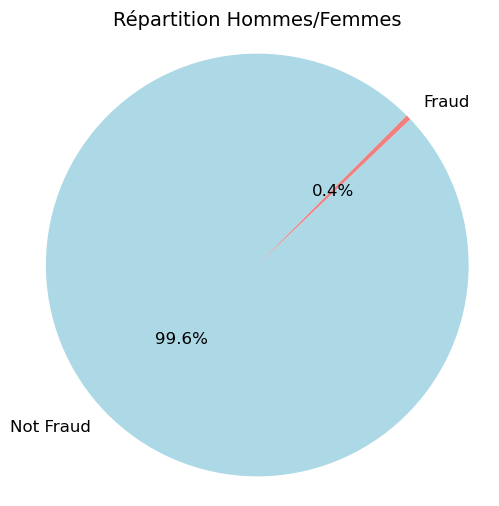

In [55]:
df_fraud = df[df['is_fraud'] == 1]['unnamed: 0'].unique()
df_not_fraud = df[df['is_fraud'] == 0]['unnamed: 0'].unique()
df_count_fraud = pd.DataFrame(["Fraud" for f in df_fraud], columns=['transactions'])
df_count_not_fraud = pd.DataFrame(["Not Fraud" for m in df_not_fraud], columns=["transactions"])
df_total = pd.concat([df_count_fraud, df_count_not_fraud])
distribution = df_total['transactions'].value_counts()

# Création du graphique en camembert
labels = distribution.index
sizes = distribution.values

plt.figure(figsize=(6, 6))

# Création du camembert
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, 
        colors=['lightblue', 'lightcoral'], textprops={'fontsize': 12},  # Légendes plus grandes
        pctdistance=0.50)  # Pourcentages un peu plus près du centre

# Titre avec gras et taille plus grande
plt.title('Répartition Hommes/Femmes', fontsize=14)

# Assure que le camembert est en cercle parfait
plt.axis('equal')  

# Affiche le graphique
plt.show()

### <span style="color:orange"><b>Conclusion :</b></span>
* Le jeu de test est plutôt propre et nécessitera donc peu de    nettoyage
* Le taux de transactions frauduleuses dans le jeu de test est de 0,39 % 
